<a href="https://colab.research.google.com/github/subhobrata/Computational-Linear-Algebra/blob/master/2_Topic_Modeling_with_NMF_and_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [4]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [6]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [7]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [8]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [0]:
num_topics, num_top_words = 6, 8

In [0]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [12]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [0]:
vocab = np.array(vectorizer.get_feature_names())

In [14]:

vocab.shape

(26576,)

In [15]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

In [16]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 36s, sys: 5.99 s, total: 1min 42s
Wall time: 52.8 s


In [17]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


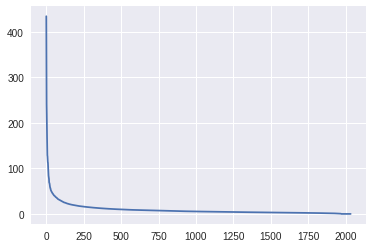

In [18]:
plt.plot(s);

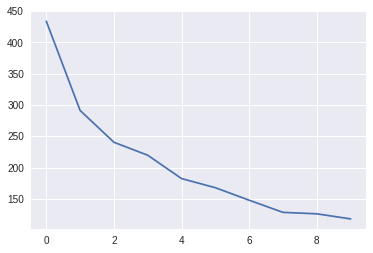

In [19]:
plt.plot(s[:10])

In [0]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [21]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [0]:
m,n=vectors.shape
d=5  # num topics

In [0]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [24]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

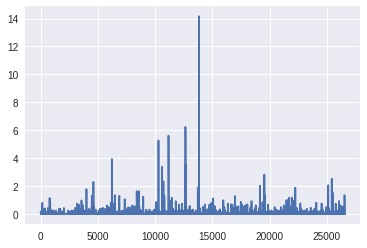

In [25]:
plt.plot(clf.components_[0])

In [26]:
clf.reconstruction_err_

683.3993486214671

In [0]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [0]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [31]:

show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

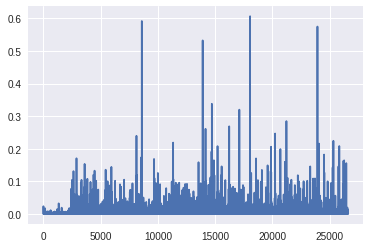

In [32]:
plt.plot(clf.components_[0])

In [33]:

clf.reconstruction_err_

43.712926057952785

In [0]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [0]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [36]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [0]:
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH

In [0]:
def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

In [0]:
def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

In [0]:
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [0]:

W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [42]:

report(vectors_tfidf, W, H)

44.425477125920736 4.725700947147704e-07 1.8715199172402432e-08 0 0


In [0]:
upd(vectors_tfidf,W,H,lr)

In [44]:
report(vectors_tfidf, W, H)

44.417863384795496 -0.0009518284036596672 -6.682467604207021e-05 155 261


In [45]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

44.41240825134457 -0.0011506883625539677 -7.18735163510315e-05 129 250
44.37513561882193 -0.0002977394309411801 -4.8063887051999844e-05 55 491
44.346722880787844 -0.00031005220903965376 -6.313186862668711e-05 28 933
44.31494284217315 -0.00015168045503475392 -8.891717797675699e-05 21 1551
44.279939718582746 -0.00012876175151884243 -0.00012118580879482167 36 2163


In [46]:

show_topics(H)

['space god people don just know think like',
 'people god think don just space like know',
 'god space don people like just think know',
 'people don god space just think know like',
 'god space people think don just like know']

In [0]:
import torch
import torch.cuda as tc
from torch.autograd import Variable

In [0]:
def V(M): return Variable(M, requires_grad=True)

In [0]:
v=vectors_tfidf.todense()

In [0]:

t_vectors = torch.Tensor(v.astype(np.float32))

In [0]:

mu = 1e-5

In [0]:
def grads_t(M, W, H):
    R = W.mm(H)-M
    return (R.mm(H.t()) + penalty_t(W, mu)*lam, 
        W.t().mm(R) + penalty_t(H, mu)*lam) # dW, dH

def penalty_t(M, mu):
    return (M<mu).type(tc.FloatTensor)*torch.clamp(M - mu, max=0.)

def upd_t(M, W, H, lr):
    dW,dH = grads_t(M,W,H)
    W.sub_(lr*dW); H.sub_(lr*dH)

def report_t(M,W,H): 
    print((M-W.mm(H)).norm(2), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [0]:
t_W = tc.FloatTensor(m,d)
t_H = tc.FloatTensor(d,n)
t_W.normal_(std=0.01).abs_(); 
t_H.normal_(std=0.01).abs_();

In [0]:
d=6; lam=100; lr=0.05